# I’ll be analyzing Tweets of none other than USA President Donald Trump

In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
consumer_key= '########################'
consumer_secret = '########################'
access_key = '########################'
access_secret = '########################'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    
# Set the access token and access token secret
authenticate.set_access_token(access_key, access_secret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [21]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="realDonaldTrump", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @WhiteHouse: "The partnership and collaboration as we went through this pandemic has been incredible," @IAGovernor said. https://t.co/Fk…

2) RT @WhiteHouse: Just now, President @realDonaldTrump welcomed incredible healthcare warriors to the Oval Office in honor of National Nurses…

3) The Fake News has reached an all time high!

4) RT @Jim_Jordan: The Senate is back in session. But the House is missing in action. 

Our latest op-ed. 
https://t.co/nbplyRyngo

5) ....to it, as appropriate. The Task Force will also be very focused on Vaccines &amp; Therapeutics. Thank you!



In [22]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @WhiteHouse: ""The partnership and collabora..."
1,"RT @WhiteHouse: Just now, President @realDonal..."
2,The Fake News has reached an all time high!
3,RT @Jim_Jordan: The Senate is back in session....
4,"....to it, as appropriate. The Task Force will..."


In [37]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,Subjectivity,Polarity,Analysis
0,": ""The partnership and collaboration as we wen...",0.9000,0.900,Positive
1,": Just now, President welcomed incredible hea...",0.9000,0.900,Positive
2,The Fake News has reached an all time high!,0.7700,-0.150,Negative
3,_Jordan: The Senate is back in session. But th...,0.2625,0.100,Positive
4,"....to it, as appropriate. The Task Force will...",0.4000,0.375,Positive
...,...,...,...,...
195,: . doesn’t want to speak about their persecut...,0.7000,-0.225,Negative
196,DIRTY COP JAMES COMEY GOT CAUGHT!,0.8000,-0.750,Negative
197,: DEMOCRATS DIDN'T EXPECT THIS - Washington Po...,0.0000,0.000,Neutral
198,: The economy is going to do so well this Summ...,0.6000,0.700,Positive


In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": ""The partnership and collaboration as we wen...",0.9000,0.900
1,": Just now, President welcomed incredible hea...",0.9000,0.900
2,The Fake News has reached an all time high!,0.7700,-0.150
3,_Jordan: The Senate is back in session. But th...,0.2625,0.100
4,"....to it, as appropriate. The Task Force will...",0.4000,0.375
...,...,...,...
195,: . doesn’t want to speak about their persecut...,0.7000,-0.225
196,DIRTY COP JAMES COMEY GOT CAUGHT!,0.8000,-0.750
197,: DEMOCRATS DIDN'T EXPECT THIS - Washington Po...,0.0000,0.000
198,: The economy is going to do so well this Summ...,0.6000,0.700


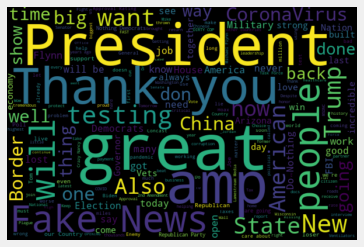

In [38]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": ""The partnership and collaboration as we wen...",0.9000,0.900,Positive
1,": Just now, President welcomed incredible hea...",0.9000,0.900,Positive
2,The Fake News has reached an all time high!,0.7700,-0.150,Negative
3,_Jordan: The Senate is back in session. But th...,0.2625,0.100,Positive
4,"....to it, as appropriate. The Task Force will...",0.4000,0.375,Positive
...,...,...,...,...
195,: . doesn’t want to speak about their persecut...,0.7000,-0.225,Negative
196,DIRTY COP JAMES COMEY GOT CAUGHT!,0.8000,-0.750,Negative
197,: DEMOCRATS DIDN'T EXPECT THIS - Washington Po...,0.0000,0.000,Neutral
198,: The economy is going to do so well this Summ...,0.6000,0.700,Positive


In [27]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) : "The partnership and collaboration as we went through this pandemic has been incredible,"  said. 

2) : Just now, President  welcomed incredible healthcare warriors to the Oval Office in honor of National Nurses…

3) _Jordan: The Senate is back in session. But the House is missing in action. 

Our latest op-ed. 


4) ....to it, as appropriate. The Task Force will also be very focused on Vaccines &amp; Therapeutics. Thank you!

5) ....gloves, gowns etc. are now plentiful. The last four Governors teleconference calls have been conclusively strong. Because of this success, the Task Force will continue on indefinitely with its focus on SAFETY &amp; OPENING UP OUR COUNTRY AGAIN. We may add or subtract people ....

6) ....produced in the thousands, and we have many to spare. We are helping other countries which are desperate for them. Likewise, after having been left little, we are now doing more testing than all other countries combined, and with superior tes

In [28]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) The Fake News has reached an all time high!

2) The White House CoronaVirus Task Force, headed by Vice President Mike Pence, has done a fantastic job of bringing together vast highly complex resources that have set a high standard for others to follow in the future. Ventilators, which were few &amp; in bad shape, are now being....

3) : For the constant criticism from the Do Nothing Democrats and their Fake News partners, here is the newest chart on our…

4) Well run States should not be bailing out poorly run States, using CoronaVirus as the excuse! The elimination of Sanctuary Cities, Payroll Taxes, and perhaps Capital Gains Taxes, must be put on the table. Also lawsuit indemnification &amp; business deductions for restaurants &amp; ent.

5) The Do Nothing Democrats and their leader, the Fake News Lamestream Media, are doing everything possible to hurt and disparage our Country. No matter what we do or say, no matter how big a win, they report that it wa

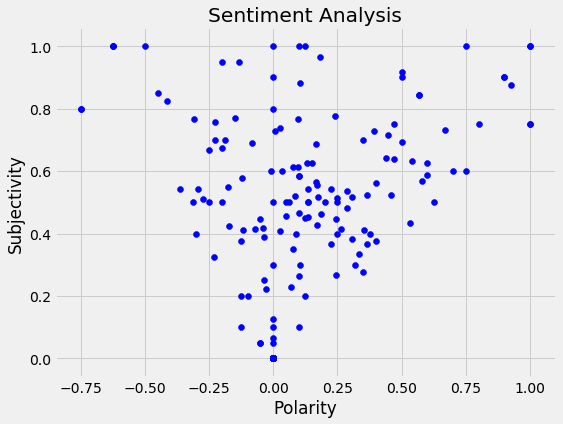

In [29]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()


In [30]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


45.5

In [31]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

21.5

In [32]:
# Show the value counts
df['Analysis'].value_counts()

Positive    91
Neutral     66
Negative    43
Name: Analysis, dtype: int64

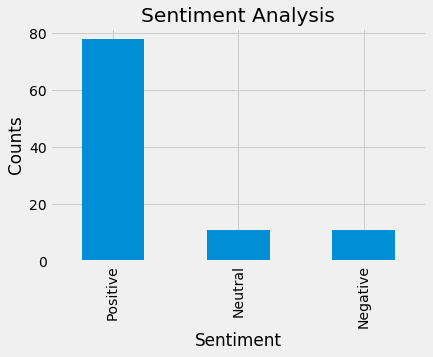

In [19]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()